In [1]:
pip install wordcloud

In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from geopy.geocoders import Nominatim
from tqdm.notebook import trange, tqdm

In [4]:
df = pd.read_csv("final_data_analyst.csv")
print(df.shape)
df.head

(1854, 14)


<bound method NDFrame.head of         ID                                              Title  \
0        0  Data Analyst, Center on Immigration and Justic...   
1        1                               Quality Data Analyst   
2        2  Senior Data Analyst, Insights & Analytics Team...   
3        3                                       Data Analyst   
4        4                             Reporting Data Analyst   
...    ...                                                ...   
1849  2247  Marketing/Communications - Data Analyst-Marketing   
1850  2248  RQS - IHHA - 201900004460 -1q Data Security An...   
1851  2249              Senior Data Analyst (Corporate Audit)   
1852  2251                Data Analyst 3, Customer Experience   
1853  2252                        Senior Quality Data Analyst   

                           Salary  Rating                             Company  \
0      $37K-$66K (Glassdoor est.)     3.2           Vera Institute of Justice   
1      $37K-$66K (Glassdoor

In [5]:
new= df["Location"].str.split(", ", expand=True)

# creating new column with the state name
df["state"]= new[1]
df.drop(df.loc[df['state']=="Arapahoe"].index, inplace=True)
df.head()

ID                                              Title  \
0   0  Data Analyst, Center on Immigration and Justic...   
1   1                               Quality Data Analyst   
2   2  Senior Data Analyst, Insights & Analytics Team...   
3   3                                       Data Analyst   
4   4                             Reporting Data Analyst   

                       Salary  Rating                             Company  \
0  $37K-$66K (Glassdoor est.)     3.2           Vera Institute of Justice   
1  $37K-$66K (Glassdoor est.)     3.8  Visiting Nurse Service of New York   
2  $37K-$66K (Glassdoor est.)     3.4                         Squarespace   
3  $37K-$66K (Glassdoor est.)     4.1                            Celerity   
4  $37K-$66K (Glassdoor est.)     3.9                             FanDuel   

       Location  Headquarters                    Size  \
0  New York, NY  New York, NY    201 to 500 employees   
1  New York, NY  New York, NY        10000+ employees   
2  New York, NY  New York, NY  1001 to 5000 employees   
3  New York, NY    McLean, VA    201 to 500 employees   
4  New York, NY  New York, NY   501 to 1000 employees   

                        ownership                          Industry  \
0          Nonprofit Organization                 Social Assistance   
1          Nonprofit Organization  Health Care Services & Hospitals   
2               Company - Private                          Internet   
3  Subsidiary or Business Segment                       IT Services   
4               Company - Private               Sports & Recreation   

                             Sector                     Revenue      min  \
0                        Non-Profit  $100 to $500 million (USD)  37000.0   
1                       Health Care      $2 to $5 billion (USD)  37000.0   
2            Information Technology    Unknown / Non-Applicable  37000.0   
3            Information Technology   $50 to $100 million (USD)  37000.0   
4  Arts, Entertainment & Recreation  $100 to $500 million (USD)  37000.0   

     max state  
0  66000    NY  
1  66000    NY  
2  66000    NY  
3  66000    NY  
4  66000    NY

In [6]:
df["Salary"]= df["Salary"].str.rstrip("(Glassdoor est.)")
df1= df["Salary"].str.split("-", expand=True)

# minimum salary
df["min"]= df1[0]
df["min"] = df["min"].str.lstrip("$")
df["min"] = df["min"].str.rstrip("K")
# data["minimum_salary ($)"] = data["minimum_salary ($)"].astype("str").astype("int")
df["min"] = pd.to_numeric(df["min"])

# maximum salary
df["max"]= df1[1]
df["max"] = df["max"].str.lstrip("$")
df["max"] = df["max"].str.rstrip("K")
df["max"]= pd.to_numeric(df["max"])

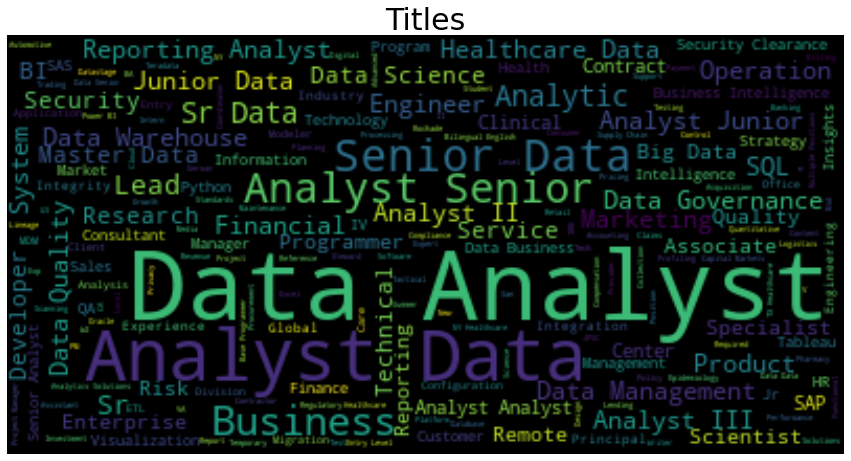

In [9]:
text= ', '.join(df['Title'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud( background_color="black").generate(text)


plt.figure(figsize=[15,20])
plt.title("Titles",size= 30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("analyst.png")

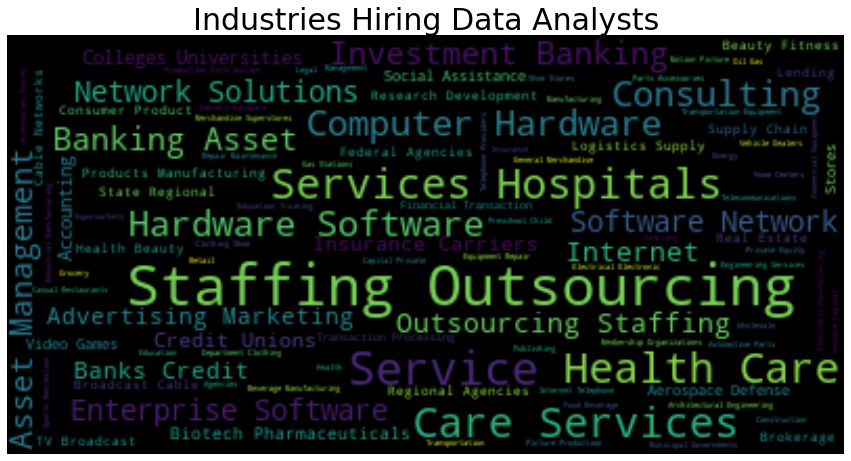

In [8]:
text= ', '.join(df['Industry'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud( background_color="black").generate(text)


plt.figure(figsize=[15,20])
plt.title("Industries Hiring Data Analysts",size= 30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file("industeries.png")

In [11]:
st.png")

SyntaxError: EOL while scanning string literal (<ipython-input-11-74f30c52088b>, line 1)

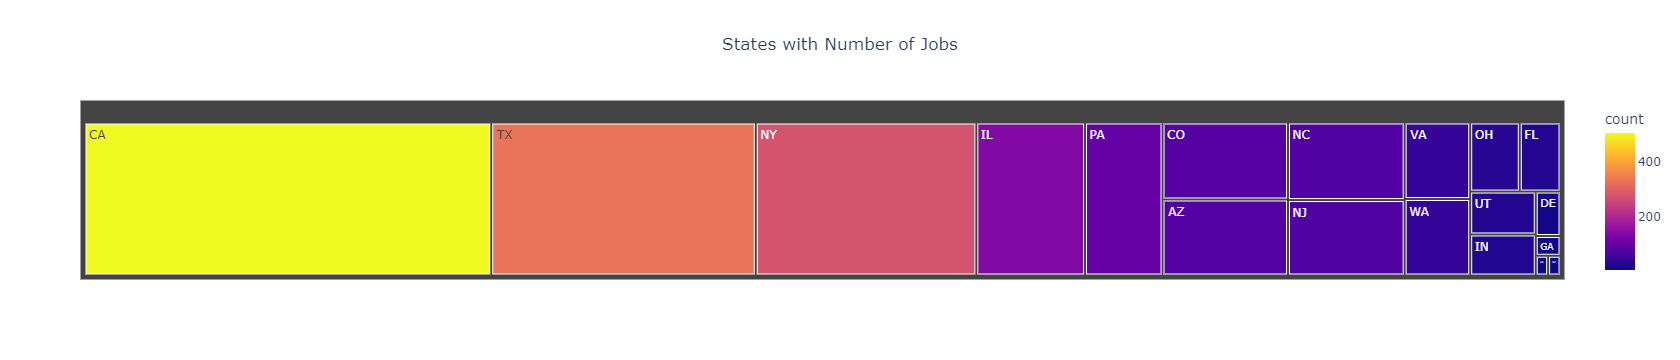

In [12]:
series= df["state"].value_counts()
df1= pd.DataFrame(series).reset_index().rename(columns={"index": "state", "state": "count"})
df1

fig = px.treemap(df1, path=['state'], values='count',color='count',color_discrete_sequence = px.colors.qualitative.Set1,
                title=('States with Number of Jobs'))
fig.update_layout(title_x=0.5)
fig.show()

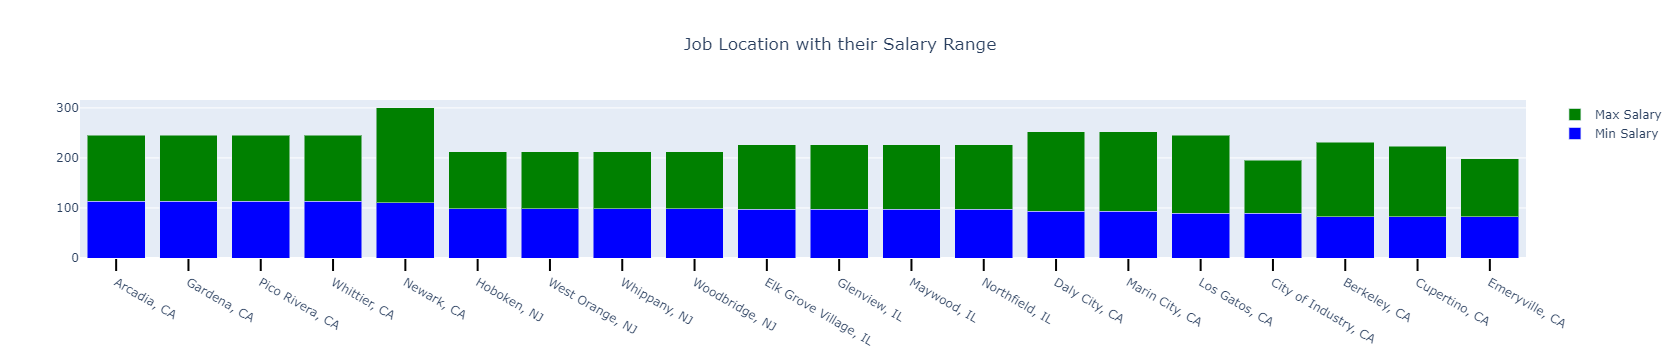

In [13]:
salary = df.groupby('Location')[['min','max']].mean().sort_values(['min','max'],                                                                             
ascending=False).head(20)

fig = go.Figure()
fig.add_trace(go.Bar(x= salary.index, y= salary['min'], name= 'Min Salary', marker= dict(color= 'blue')))
fig.add_trace(go.Bar(x= salary.index, y= salary['max'], name= 'Max Salary', marker= dict(color= 'green')))
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='black', ticklen=12)
fig.update_layout(title= 'Job Location with their Salary Range', barmode= 'stack',title_x=0.5)

fig.show()

In [14]:
df["Sector"].unique()

array(['Non-Profit', 'Health Care', 'Information Technology',
       'Arts, Entertainment & Recreation', 'Finance', 'Insurance',
       'Business Services', 'Restaurants, Bars & Food Services', 'Media',
       'Accounting & Legal', 'Real Estate', 'Government',
       'Consumer Services', 'Biotech & Pharmaceuticals', 'Education',
       'Construction, Repair & Maintenance',
       'Oil, Gas, Energy & Utilities', 'Retail', 'Manufacturing',
       'Aerospace & Defense', 'Telecommunications',
       'Transportation & Logistics', 'Mining & Metals',
       'Travel & Tourism'], dtype=object)

In [15]:
df["Sector"].replace({"-1": "unknown"}, inplace=True)

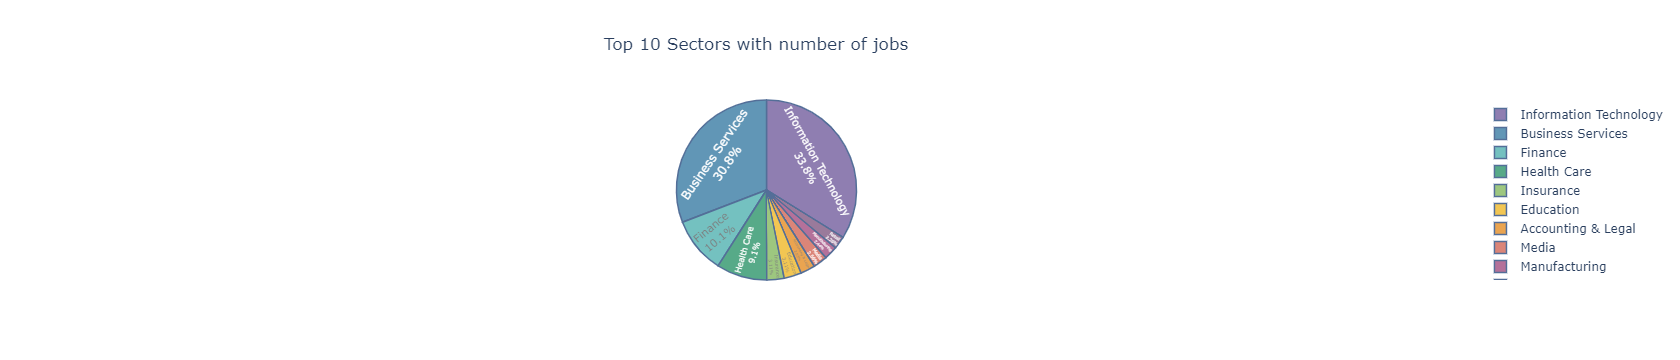

In [16]:
sector= df['Sector'].value_counts().nlargest(n=10)
sector_df= pd.DataFrame(sector).reset_index().rename(columns= {"index":"sector", "Sector":"job count"})

fig = px.pie(sector_df, 
       values = "job count", 
       names = "sector",
       labels= "sector",       
       title="Top 10 Sectors with number of jobs", 
       color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_traces(opacity=0.7,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, textposition='inside', textinfo='percent+label')

fig.update_layout(title_x=0.45)
fig.show()
fig.write_html("top10sectors.html")

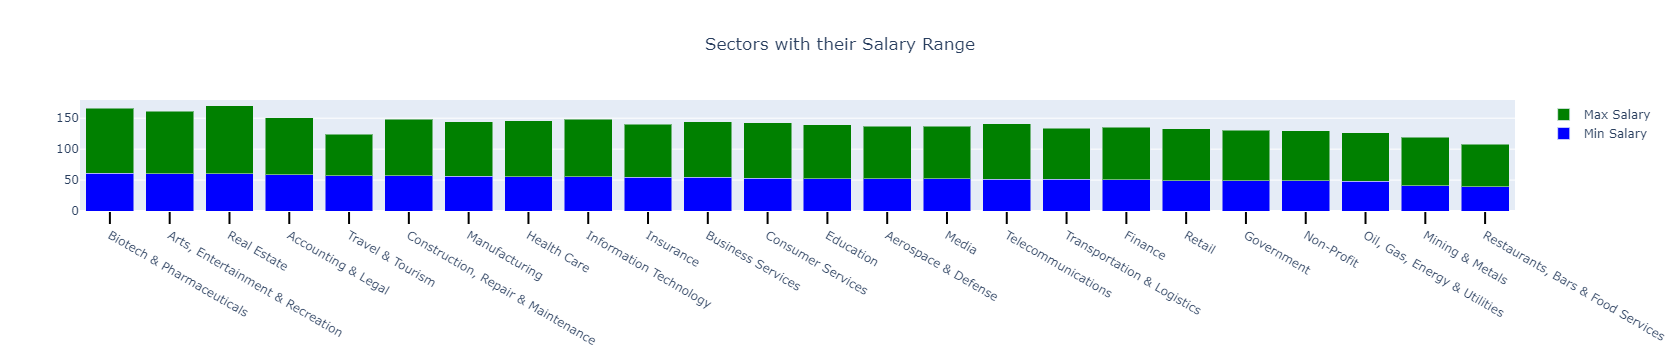

In [17]:
salary = df.groupby('Sector')[['min','max']].mean().sort_values(['min','max'],ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x = salary.index, y = salary['min'], name = 'Min Salary', marker = dict(color = 'blue')))
fig.add_trace(go.Bar(x = salary.index, y = salary['max'], name = 'Max Salary', marker = dict(color = 'green')))
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='black', ticklen=12)
fig.update_layout(title = 'Sectors with their Salary Range', barmode = 'stack',title_x=0.5)

fig.show()

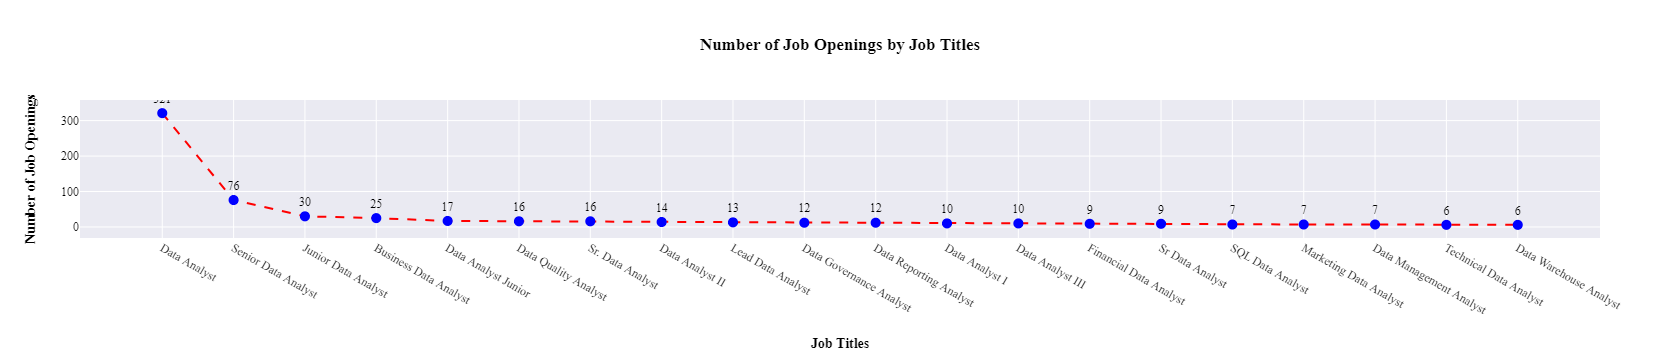

In [18]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x= df['Title'].value_counts()[:20].index,
    y= df['Title'].value_counts()[:20].values,
    name='Number of Job Openings',
    mode='markers+text+lines',
    marker_color='blue',
    marker_size=10,
    text=df['Title'].value_counts()[:20].values,
    textposition='top center',
    line=dict(color='red',dash='dash'),
))
fig.update_layout(
    title= "<b>Number of Job Openings by Job Titles</b>",
    xaxis_title="<b>Job Titles</b>",
    yaxis_title="<b>Number of Job Openings</b>",
    template='seaborn',
    font=dict(
        size=12,
        color="Black",
        family="Oswald', sans-serif"
        ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    yaxis2=dict(showgrid=True,overlaying='y',side='right',title='<b>Number of Job Openings</b>'),
    legend=dict(yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.78)
)
fig.show()

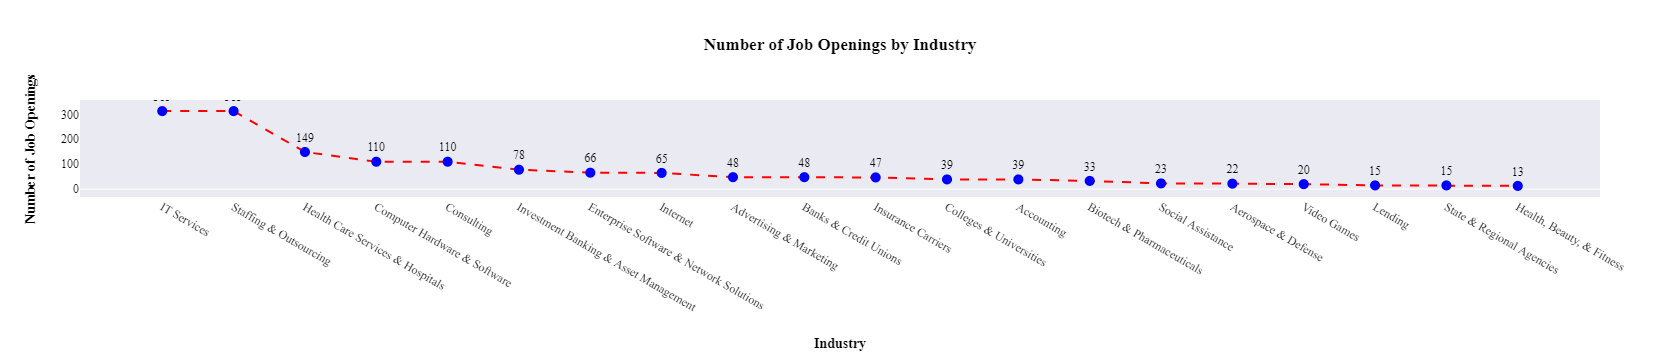

In [19]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x= df['Industry'].value_counts()[:20].index,
    y= df['Industry'].value_counts()[:20].values,
    name='Number of Job Openings',
    mode='markers+text+lines',
    marker_color='blue',
    marker_size=10,
    text=df['Industry'].value_counts()[:20].values,
    textposition='top center',
    line=dict(color='red',dash='dash'),
))
fig.update_layout(
    title= "<b>Number of Job Openings by Industry</b>",
    xaxis_title="<b>Industry</b>",
    yaxis_title="<b>Number of Job Openings</b>",
    template='seaborn',
    font=dict(
        size=12,
        color="Black",
        family="Oswald', sans-serif"
        ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    yaxis2=dict(showgrid=True,overlaying='y',side='right',title='<b>Number of Job Openings</b>'),
    legend=dict(yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.78)
)
fig.show()


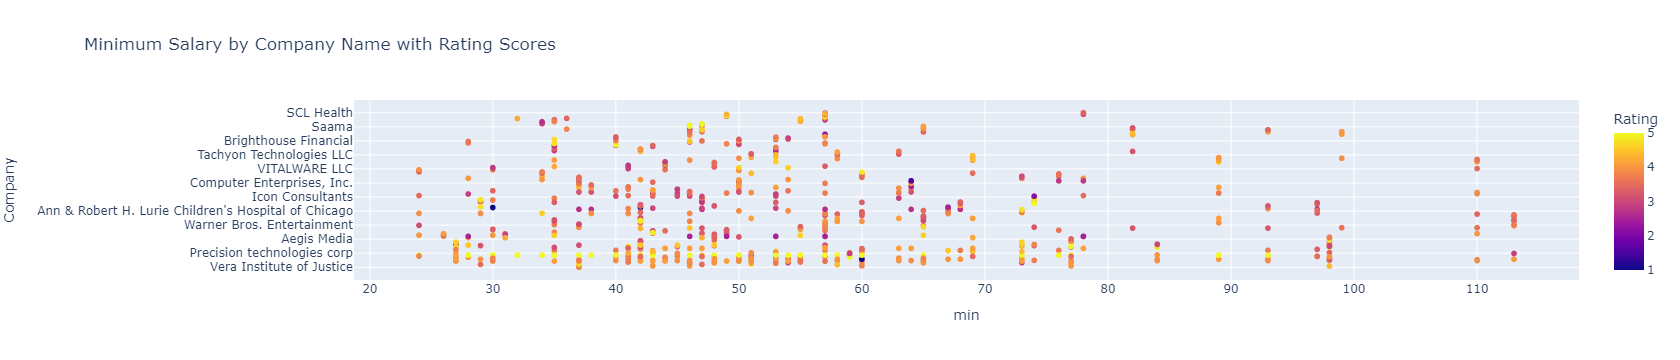

In [20]:
fig = px.scatter(df, x="min", y="Company", 
                 color="Rating", 
                 hover_data=['Industry', 'Title'], 
                 title = "Minimum Salary by Company Name with Rating Scores")
fig.show()
fig.write_html("min_salary.html")

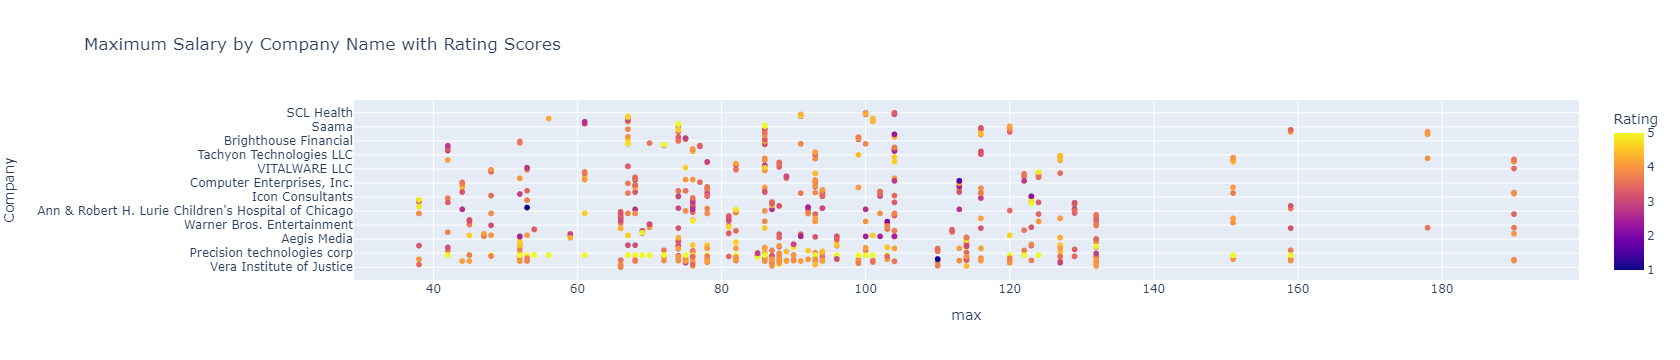

In [21]:
fig = px.scatter(df, x="max", y="Company", 
                 color="Rating", 
                 hover_data=['Industry', 'Title'], 
                 title = "Maximum Salary by Company Name with Rating Scores")
fig.show()
fig.write_html("max_salary.html")

In [22]:
def get_coordinates(loc_name):
    geolocator = Nominatim(user_agent="test user agent")
    location = geolocator.geocode(loc_name+ " US")
    return (location.latitude, location.longitude)

In [23]:
row_number=0
geo_locations=pd.DataFrame()


for addr in tqdm(df.Location.unique()):
    geo_locations.loc[row_number,'Location']=addr
    coord=get_coordinates(addr)
    geo_locations.loc[row_number,'Lat']=coord[0]
    geo_locations.loc[row_number,'Lot']=coord[1]
    row_number +=1

  0%|          | 0/230 [00:00<?, ?it/s]

In [ ]:
geo_locations.to_csv('clean_data_analyst.csv', index=False)

df_count=df.Location.value_counts().rename_axis('Location').reset_index(name='counts')

job_locations=pd.merge(df_count, geo_locations, on="Location")

In [ ]:
fig = px.scatter_mapbox(job_locations, lat="Lat", lon="Lot", size="counts",hover_name="Location",title='Interactive Job Location Density Map',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=3, color_discrete_sequence=["fuchsia"], mapbox_style="carto-positron")
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="stamen-terrain") 
fig.show()
fig.write_html("map.html")

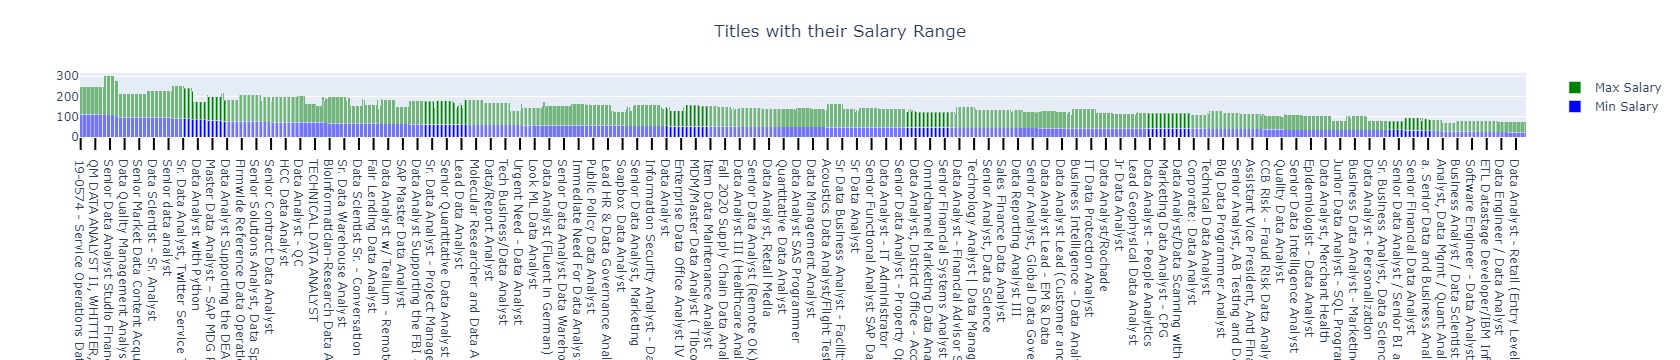

In [27]:
salary = df.groupby('Title')[['min','max']].mean().sort_values(['min','max'],ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x = salary.index, y = salary['min'], name = 'Min Salary', marker = dict(color = 'blue')))
fig.add_trace(go.Bar(x = salary.index, y = salary['max'], name = 'Max Salary', marker = dict(color = 'green')))
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='black', ticklen=12)
fig.update_layout(title = 'Titles with their Salary Range', barmode = 'stack',title_x=0.5)

fig.show()